# Assignment3_투빅스 14기 이혜린

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 로지스틱 회귀분석은 cutoff 설정 값에 따라 classification의 성능이 달라집니다.      
   해당 데이터셋에 걸맞는 cutoff value를 찾아보고, 이를 기반으로 예측을 진행해 성능을 평가해 주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [646]:
import pandas as pd
import numpy as np
import seaborn as sns

In [647]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [648]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [649]:
credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


평균, 분산, 그리고 range가 크게 다르지 않기 때문에 scaling은 진행하지 않는다.

## 1. Logistic Regression 

In [650]:
credit['Class'].value_counts()

0    28432
1      246
Name: Class, dtype: int64

In [651]:
credit['Class'].value_counts()/credit.shape[0]

0    0.991422
1    0.008578
Name: Class, dtype: float64

In [652]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [653]:
X = credit.drop(['Class'], axis=1)
y = credit['Class']

In [654]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [655]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22942, 28) (5736, 28) (22942,) (5736,)


In [656]:
# Logistic Regression 
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [657]:
y_pred = logistic.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [658]:
# [0으로 분류될 확률, 1로 분류될 확률]
logistic.predict_proba(X_test)

array([[9.99316254e-01, 6.83746077e-04],
       [9.99691083e-01, 3.08916604e-04],
       [9.80890237e-01, 1.91097629e-02],
       ...,
       [9.99681035e-01, 3.18965393e-04],
       [9.98841721e-01, 1.15827928e-03],
       [9.99727569e-01, 2.72430554e-04]])

In [659]:
# mean accuracy 
logistic.score(X_test, y_test)

0.9980822873082287

In [660]:
prob = [prob[1] for prob in logistic.predict_proba(X_test)] # class 1에 속할 확률 

In [661]:
ce_df = {
    'y_test' : y_test, # 실제
    'y_pred' : y_pred, # 예측
    'prob' : prob      # 1로 분류할 확률 
}

ce_df = pd.DataFrame(ce_df)

In [662]:
ce_df 

,y_test,y_pred,prob
2124,0,0,0.000684
5521,0,0,0.000309
21800,0,0,0.019110
16959,0,0,0.000142
27369,0,0,0.000124
...,...,...,...
15423,0,0,0.000667
21691,0,0,0.001662
27825,0,0,0.000319
1717,0,0,0.001158


In [663]:
yi = ce_df["y_test"].to_numpy()
pi = ce_df["prob"].to_numpy()

In [664]:
# cross entropy 
-np.sum((yi * np.log(pi) + (1-yi) * np.log(1-pi))) / ce_df.shape[0]

0.0074438746962333545

cross entropy가 지나치게 낮다.

## 2. Metrics Evaluation 

### 1) sklearn 패키지를 이용한 성능 평가지표 계산 

In [665]:
from sklearn.metrics import *

In [666]:
confusion_matrix(y_test, y_pred)

array([[5690,    4],
       [   7,   35]], dtype=int64)

In [667]:
accuracy_score(y_test, y_pred) #전체 샘플 중 맞은 개수

0.9980822873082287

In [668]:
precision_score(y_test, y_pred) #정밀도 (예측 양성 중 실제 양성)

0.8974358974358975

In [669]:
recall_score(y_test, y_pred) #재현율 (실제 양성 중 예측 양성) = sensitivity

0.8333333333333334

In [670]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      5694
     class 1       0.90      0.83      0.86        42

    accuracy                           1.00      5736
   macro avg       0.95      0.92      0.93      5736
weighted avg       1.00      1.00      1.00      5736



macro: 단순평균  
weighted: 각 클래스에 속하는 표본의 갯수로 가중평균

### 2) confusion matrix를 이용한 성능 평가지표 계산 

In [671]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [672]:
accuracy = (tn + tp) / X_test.shape[0]
print("accuracy: ", accuracy)

accuracy:  0.9980822873082287


In [673]:
precision = tp / (tp + fp) #예측 양성 중 실제 양성
recall = tp / (tp + fn) #실제 양성 중 예측 양성
specificity = tn / (fp + tn)  #실제 음성 중 예측 음성
f1_score = (2*precision*recall) / (precision + recall)

In [674]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.8974358974358975
recall:  0.8333333333333334
specificity:  0.9992975061468212
f1_score:  0.8641975308641975


### 3) cut-off value 찾아보기 
* fpr = fall-out = 1-specificity
* tpr = sensitivity

In [675]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob)

In [676]:
print(fpr, tpr, thresholds)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.75623463e-04
 1.75623463e-04 3.51246927e-04 3.51246927e-04 7.02493853e-04
 7.02493853e-04 1.05374078e-03 1.05374078e-03 1.40498771e-03
 1.40498771e-03 1.58061117e-03 1.58061117e-03 1.56304882e-02
 1.56304882e-02 2.10748156e-02 2.10748156e-02 2.55532139e-01
 2.55883386e-01 3.10853530e-01 3.11204777e-01 3.63891816e-01
 3.64243063e-01 5.56550755e-01 5.57077626e-01 8.34387074e-01
 8.34738321e-01 8.79873551e-01 8.80224798e-01 9.90867580e-01
 9.91218827e-01 1.00000000e+00] [0.         0.02380952 0.52380952 0.52380952 0.5952381  0.5952381
 0.76190476 0.76190476 0.83333333 0.83333333 0.88095238 0.88095238
 0.9047619  0.9047619  0.95238095 0.95238095 0.97619048 0.97619048
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ] [2.00000000e+00 1.00000000e+00 9.96923342e-01 9.90888571e-01
 9.82655362e-01 9.79741220e-01 6.71799378e-01 6.4074183

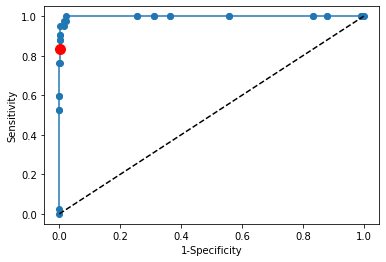

In [677]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [678]:
# roc curve 아래의 면적 
from sklearn.metrics import auc
auc = auc(fpr, tpr)
auc

0.998845902955492

imbalanced data라 auc가 지나치게 높다

## 3. 새로운 cutoff value로 모델 예측하기 

In [726]:
optimal_threshold = thresholds[np.argmax(tpr-fpr)]
optimal_threshold

0.012001888394633287

In [727]:
X_test = X_test.reset_index(drop=True)

In [728]:
def logistic_fn(X, beta):
    z = X@beta
    prob = 1 / (1 + np.exp(-z))
    return prob

In [729]:
predict_prob = logistic_fn(X_test, np.transpose(logistic.coef_))

In [730]:
predict_new = [1 if predict_prob.iloc[i,0]>=optimal_threshold else 0 for i in range(predict_prob.shape[0])]

In [731]:
# 새로운 cutoff value로 분류한 confusion matrix 
confusion_matrix(y_test, predict_new)

array([[  61, 5633],
       [   0,   42]], dtype=int64)

In [733]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_new).ravel()

In [734]:
accuracy = (tn + tp) / X_test.shape[0]
print("accuracy: ", accuracy)

accuracy:  0.017956764295676428


In [735]:
precision = tp / (tp + fp)
recall = tp / (tp + fn) #sensitivity
specificity = tn / (tn + fp)
f1_score = (2*precision*recall) / (precision + recall)

In [736]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.0074008810572687225
recall:  1.0
specificity:  0.010713031260976466
f1_score:  0.01469302081511282


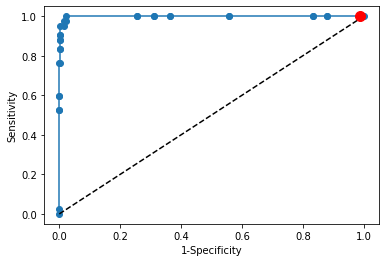

In [737]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

#### Q. cutoff value를 바꿔서 나온 결과의 의의는 무엇일까요 ?  
  
분류 모델링에서 최적의 optimal cutoff를 찾아서 모델에 적용하는 것은 중요하다.. 근데 답이 만족스럽게 안나와서 이 부분은 피드백을 받고 싶어요! (어디가 틀린지 잘 모르겠어서 ㅜㅜ)